## Plotting functions in PIASO

This notebook will demonstrate the different plotting functions and their application to sample data.

In [1]:
path = '/home/vas744/Analysis/Python/Packages/PIASO'
import sys
sys.path.append(path)

In [2]:
import importlib
from scipy import sparse
import piaso
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
sc.set_figure_params(dpi=80,dpi_save=300, color_map='viridis',facecolor='white')
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
save_dir='/data1/vallaris/Results/single-cell/Methods/PIASO'
sc.settings.figdir = save_dir
prefix='GitHub_testing'

In [4]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the data

The 20k subsampled snRNA-seq data from Allen SEA-AD project is available in google drive: https://drive.google.com/file/d/1nH-CRaTQFxJ5pAVpy8_hUQn1nrIcakq2/view?usp=drive_link.

The original data is available in https://portal.brain-map.org/explore/seattle-alzheimers-disease.

In [5]:
adata=sc.read('/n/scratch/users/v/vas744/Data/Public/PIASO/SEA-AD_RNA_MTG_subsample_excludeReference_20k_piaso.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 20000 × 36601
    obs: 'sample_id', 'Neurotypical reference', 'Donor ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mont

### Visualize with a discrete color map

The discrete color map can be used to visualize the categorical variables such as cell subclass.

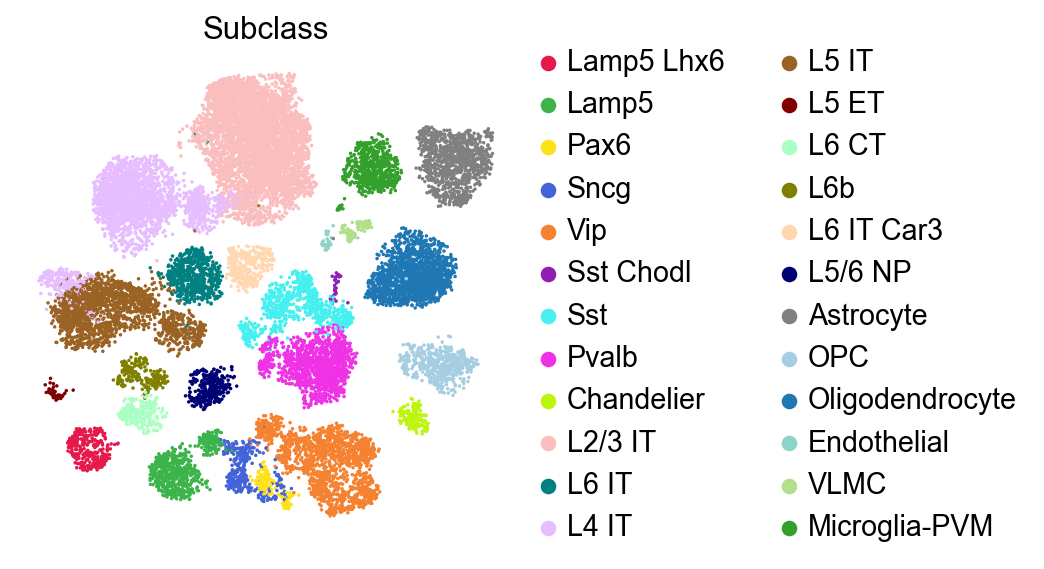

In [7]:
sc.pl.embedding(adata,
                basis='X_umap',
                color=['Subclass'],
                palette=piaso.pl.color.d_color3,
                legend_fontoutline=2,
                legend_fontweight=5,
                cmap='Spectral_r',
                size=10,
                frameon=False)

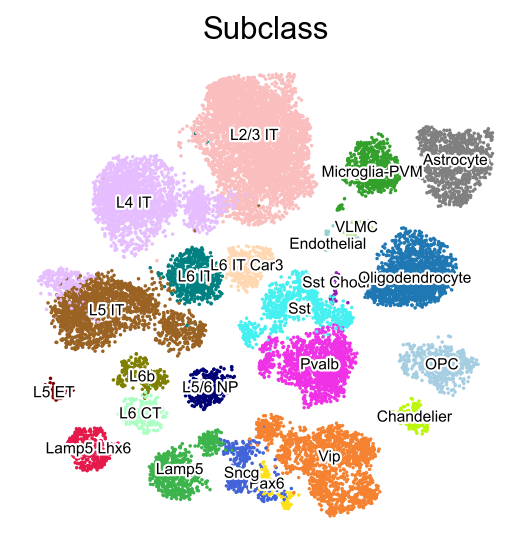

In [8]:
sc.pl.embedding(adata,
                basis='X_umap',
                color=['Subclass'],
                palette=piaso.pl.color.d_color3,
                legend_fontoutline=2,
                legend_fontsize=7,
                legend_fontweight=5,
                legend_loc='on data',
                cmap='Spectral_r',
                size=10,
                frameon=False)

### Visualize with a continuous color map

The continuous color map can be used to visualize the continuous variables such as gene expression.

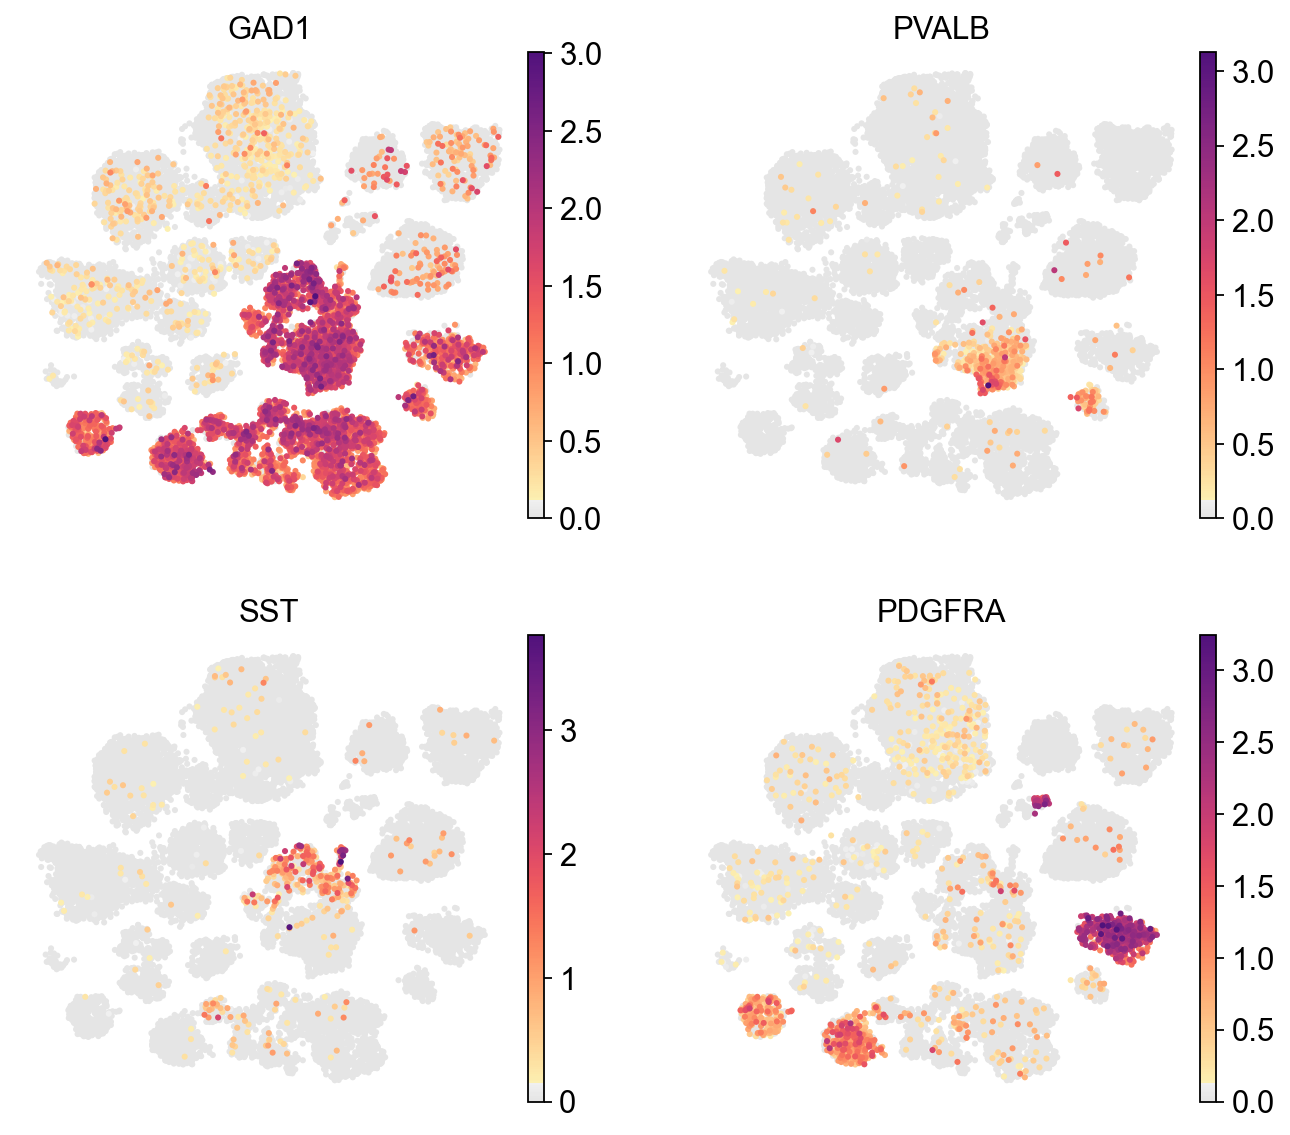

In [9]:
sc.pl.umap(adata,
           color=['GAD1', 'PVALB', 'SST', 'PDGFRA'],
           cmap=piaso.pl.color.c_color1,
           legend_fontsize=10,
           legend_fontoutline=3,
           ncols=2,
           size=30,
           frameon=False)

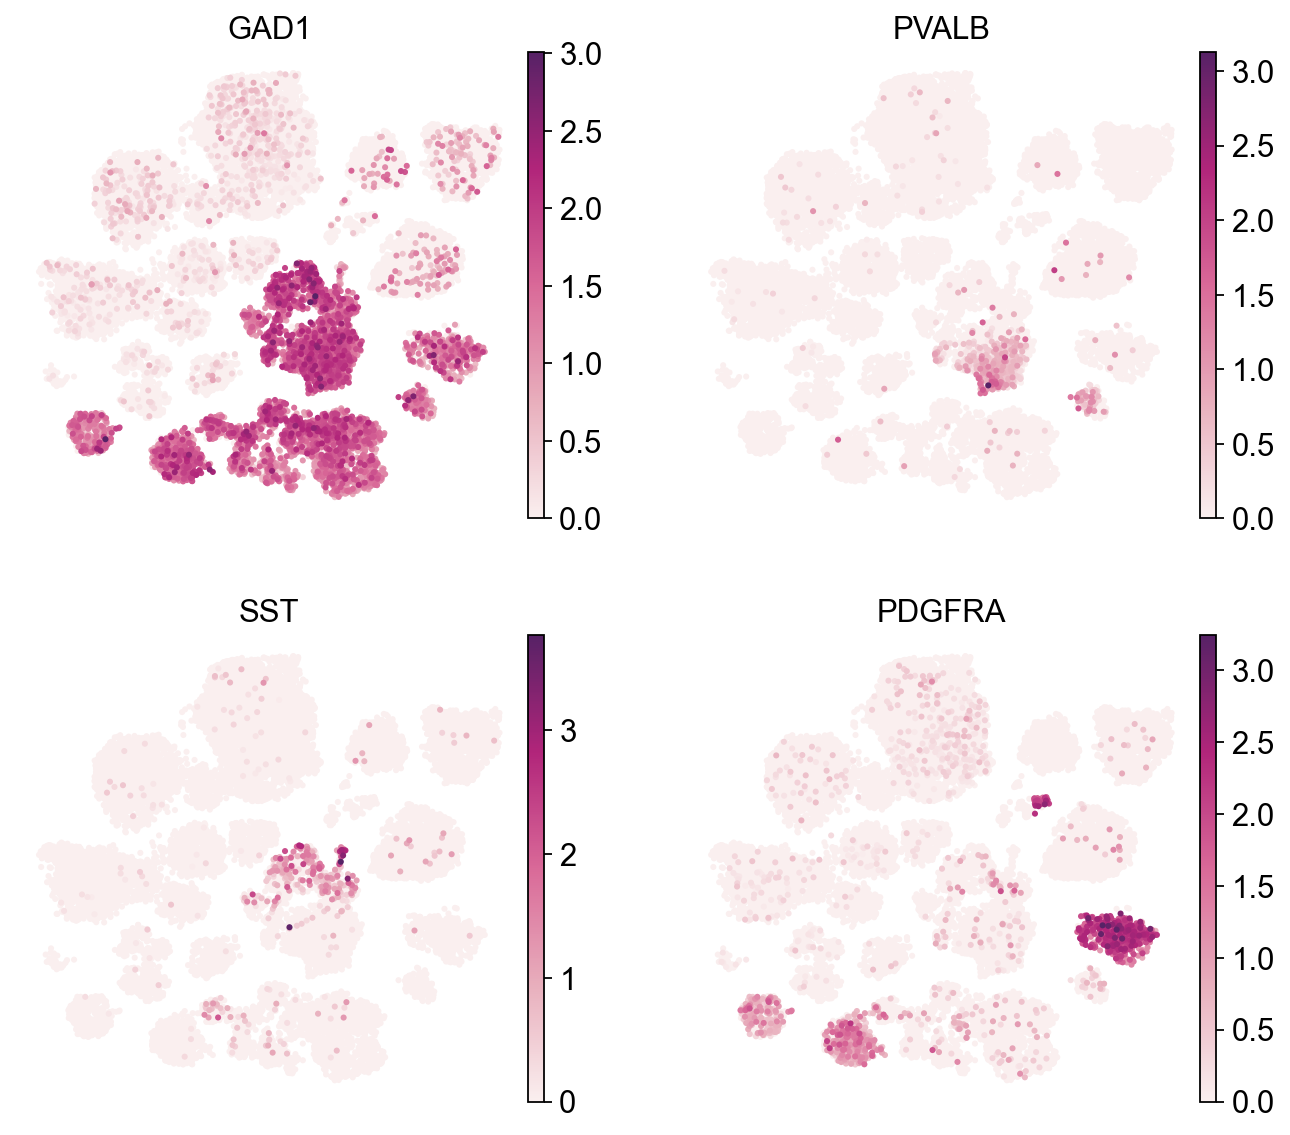

In [10]:
sc.pl.umap(adata,
           color=['GAD1', 'PVALB', 'SST', 'PDGFRA'],
           cmap=piaso.pl.color.c_color4,
           legend_fontsize=10,
           legend_fontoutline=3,
           ncols=2,
           size=30,
           frameon=False)

#### Built-in continuous color map options

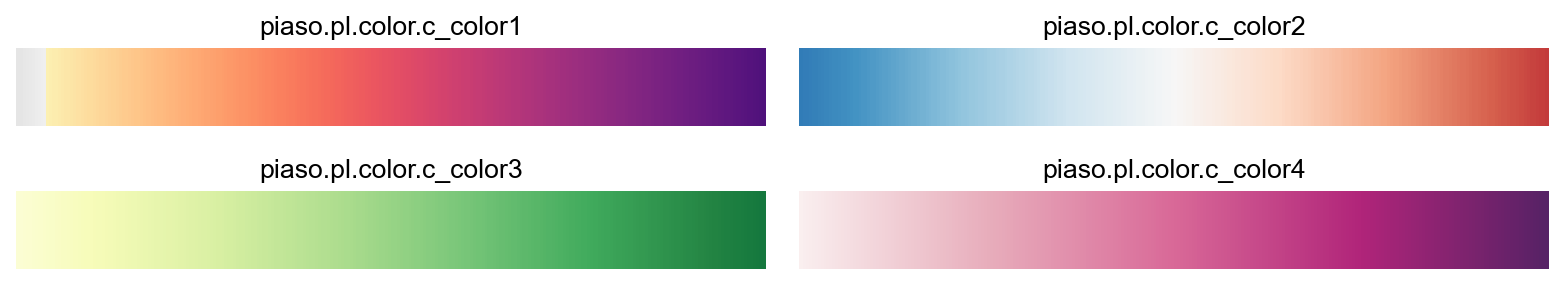

In [11]:
gradient = np.linspace(0, 1, 256).reshape(1, -1)

fig, axes = plt.subplots(2, 2, figsize=(10, 2))
titles = ["piaso.pl.color.c_color1", "piaso.pl.color.c_color2", "piaso.pl.color.c_color3", "piaso.pl.color.c_color4"]
cmaps=[piaso.pl.color.c_color1, piaso.pl.color.c_color2, piaso.pl.color.c_color3, piaso.pl.color.c_color4]

for ax, cmap, title in zip(axes.flat, cmaps, titles):
    ax.imshow(gradient, aspect="auto", cmap=cmap)
    ax.set_title(title, fontsize=12, fontweight="regular")
    ax.set_xticks([])
    ax.set_yticks([]) 
    ax.set_frame_on(False)  

plt.tight_layout()
plt.show()

### Split the UMAP by condition

In [12]:
mapping_dict=dict(zip(adata.obs['CERAD score'], adata.obs['CERAD score']))

In [13]:
mapping_dict={'Absent': 'Absent',
 'Sparse': 'Disease',
 'Moderate': 'Disease',
 'Frequent': 'Disease'}

In [14]:
adata.obs['Condition']=adata.obs['CERAD score'].map(mapping_dict)

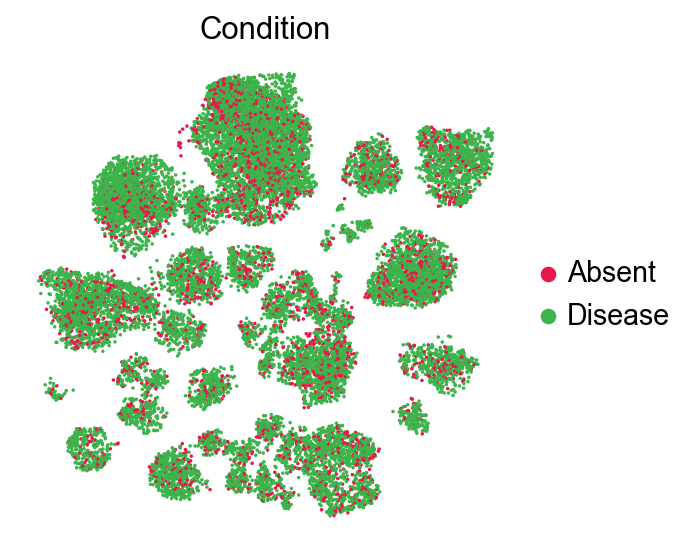

In [15]:
sc.pl.embedding(adata,
                basis='X_umap',
                color=['Condition'],
                palette=piaso.pl.color.d_color1,
                legend_fontoutline=2,
                legend_fontweight=5,
                cmap='Spectral_r',
                size=10,
                frameon=False)

##### Visualizing the expression of a specific gene across two different experimental conditions

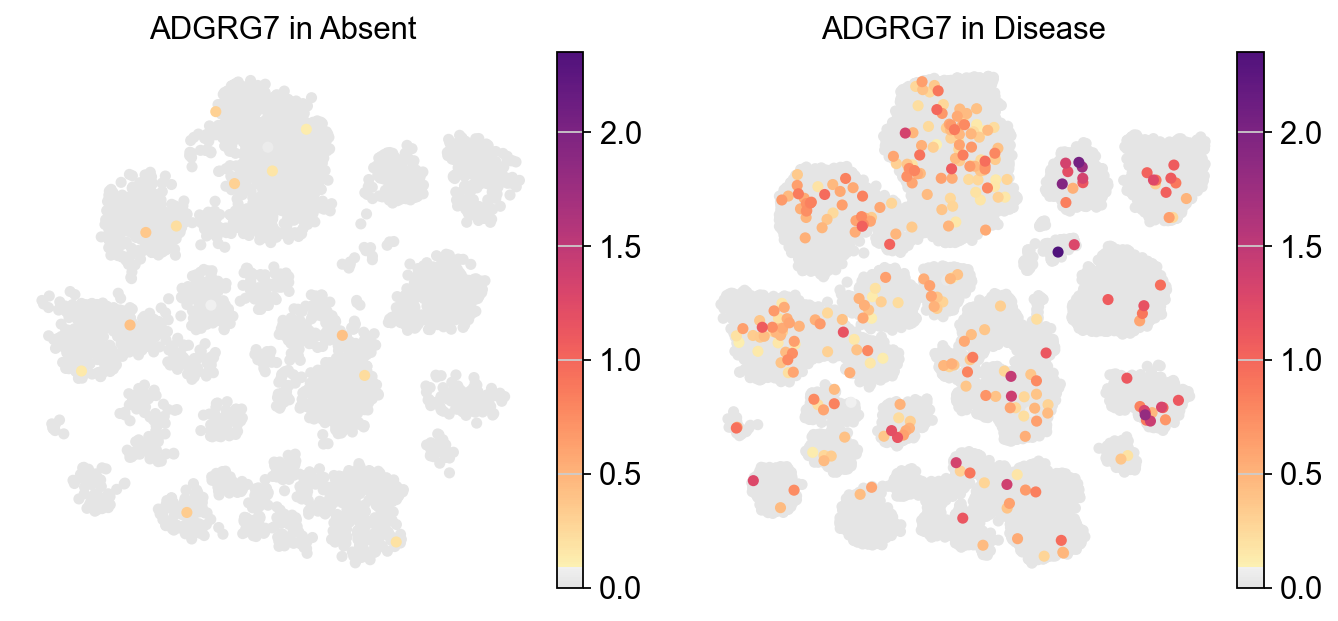

In [16]:
piaso.pl.plot_embeddings_split(adata,
                               color='ADGRG7',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,)

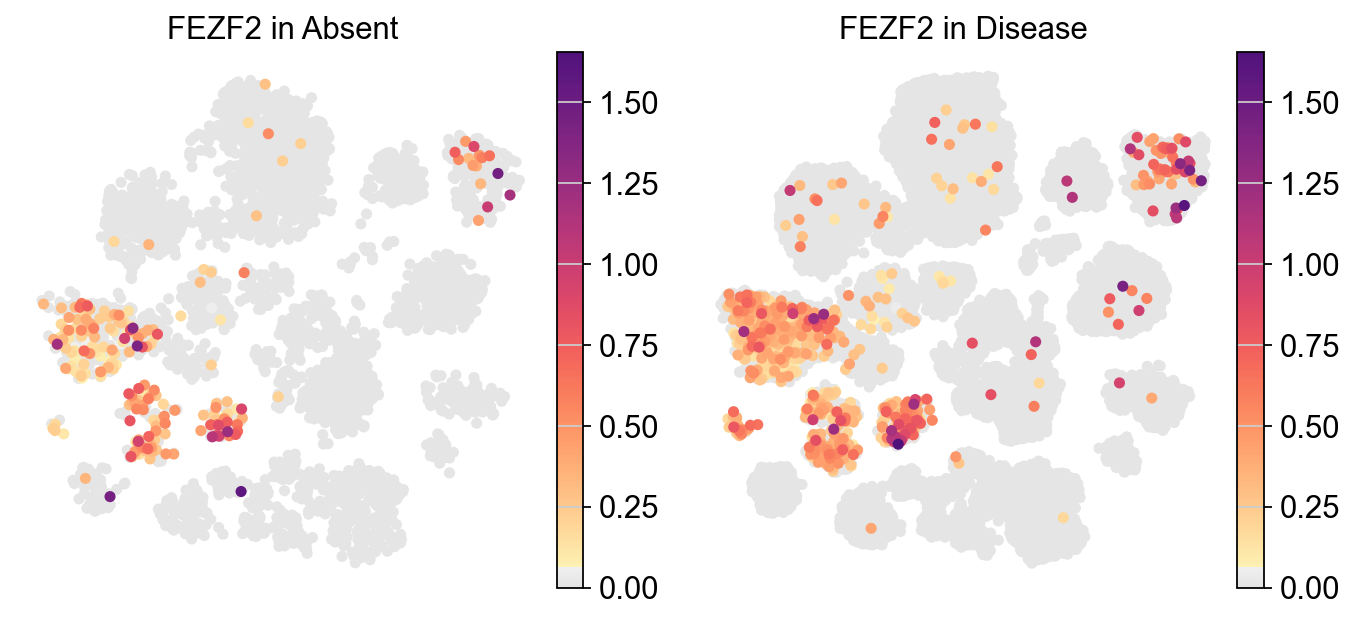

In [17]:
piaso.pl.plot_embeddings_split(adata,
                               color='FEZF2',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,)

##### Visulaizing continuous variables (Number of UMIs) across different experimental conditions

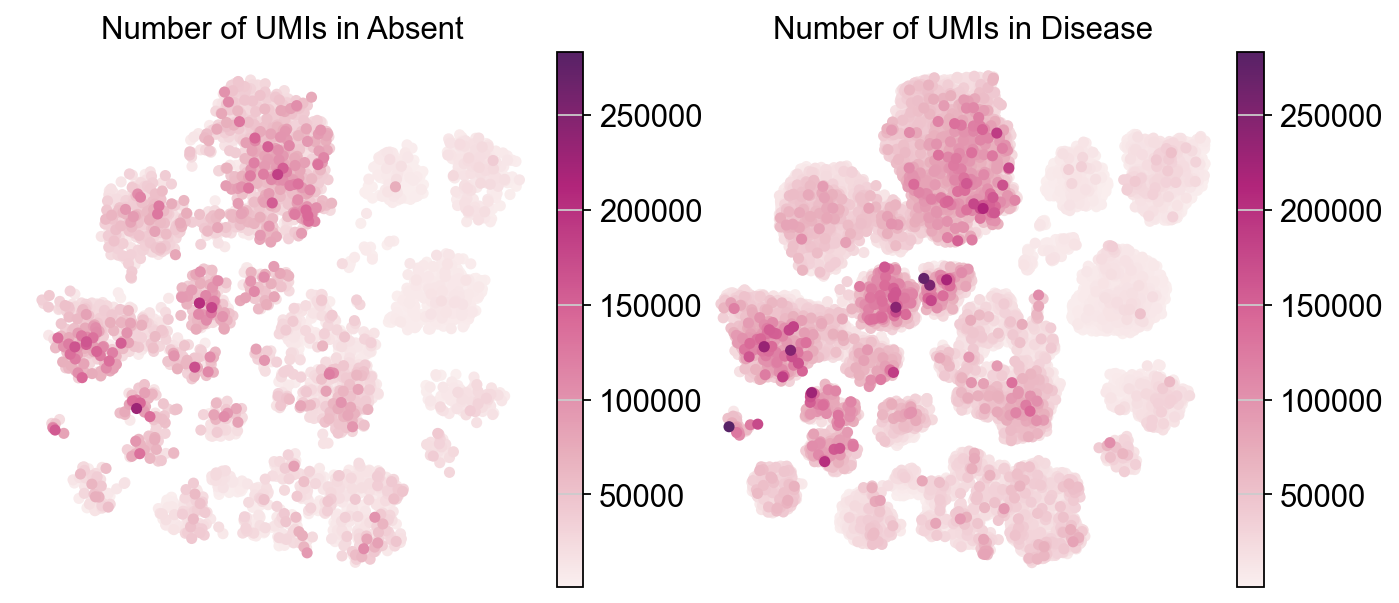

In [18]:
piaso.pl.plot_embeddings_split(adata,
                               color='Number of UMIs',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color4,
                               size=100,
                               frameon=False,
                               legend_loc=None)

##### Visualizing categorical variables (Cell subclass) across different experimental conditions

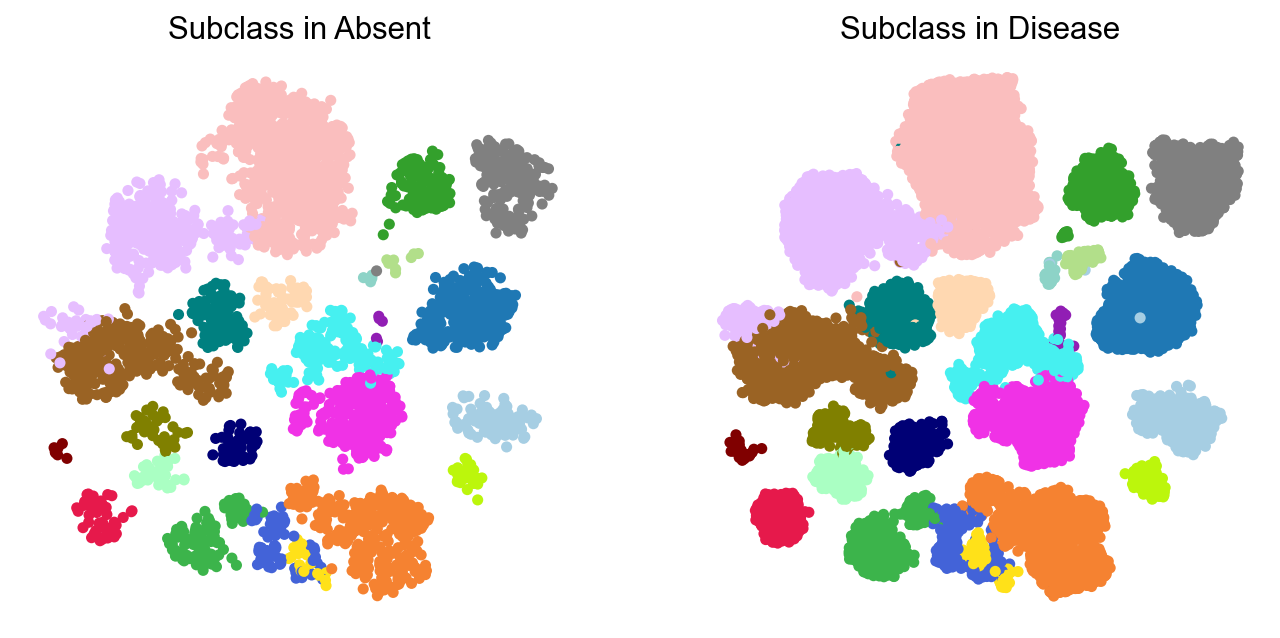

In [19]:
piaso.pl.plot_embeddings_split(adata,
                               color='Subclass',
                               layer=None,
                               splitby='Condition',
                               size=100,
                               frameon=False,
                               legend_loc=None)

We can visualize these cell subclasses alongside the subclass legend. To enhance clarity, the ncol parameter can be used to adjust the number of subplots per row.

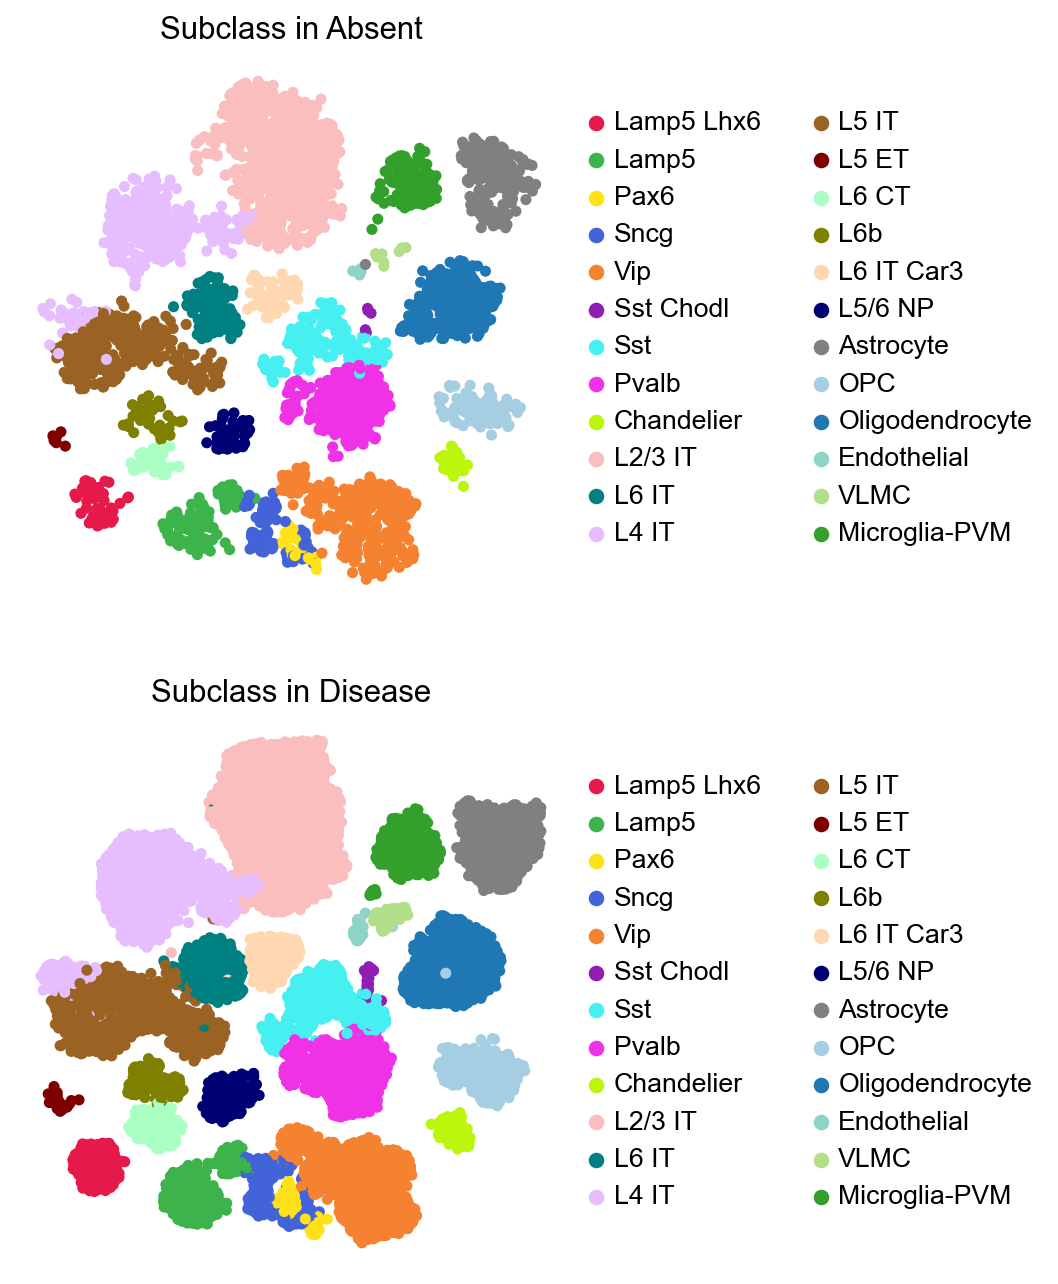

In [20]:
piaso.pl.plot_embeddings_split(adata,
                               color='Subclass',
                               layer=None,
                               splitby='Condition',
                               size=100,
                               frameon=False,
                               ncol=1)

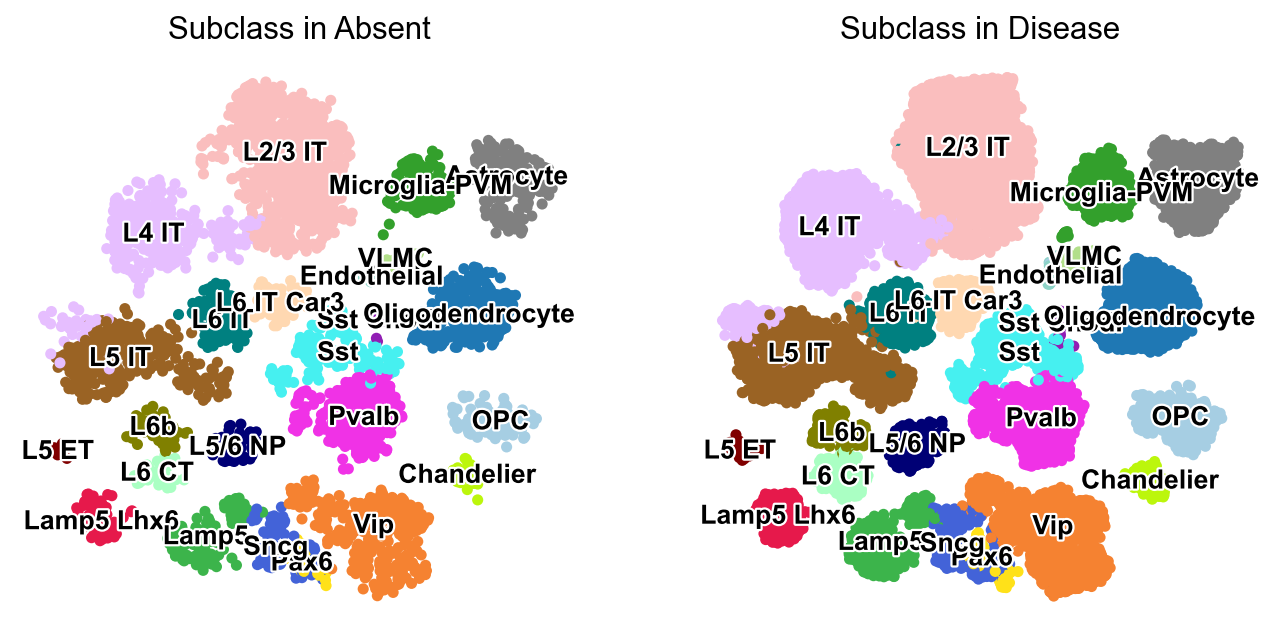

In [21]:
piaso.pl.plot_embeddings_split(adata,
                               color='Subclass',
                               layer=None,
                               splitby='Condition',
                               size=100,
                               frameon=False,
                               legend_loc='on data')

### Violin plots of grouped data
Visulaize how the groups in the dataset vary across a list of different features. Here, you can plot a different subplot for each feature of interest.

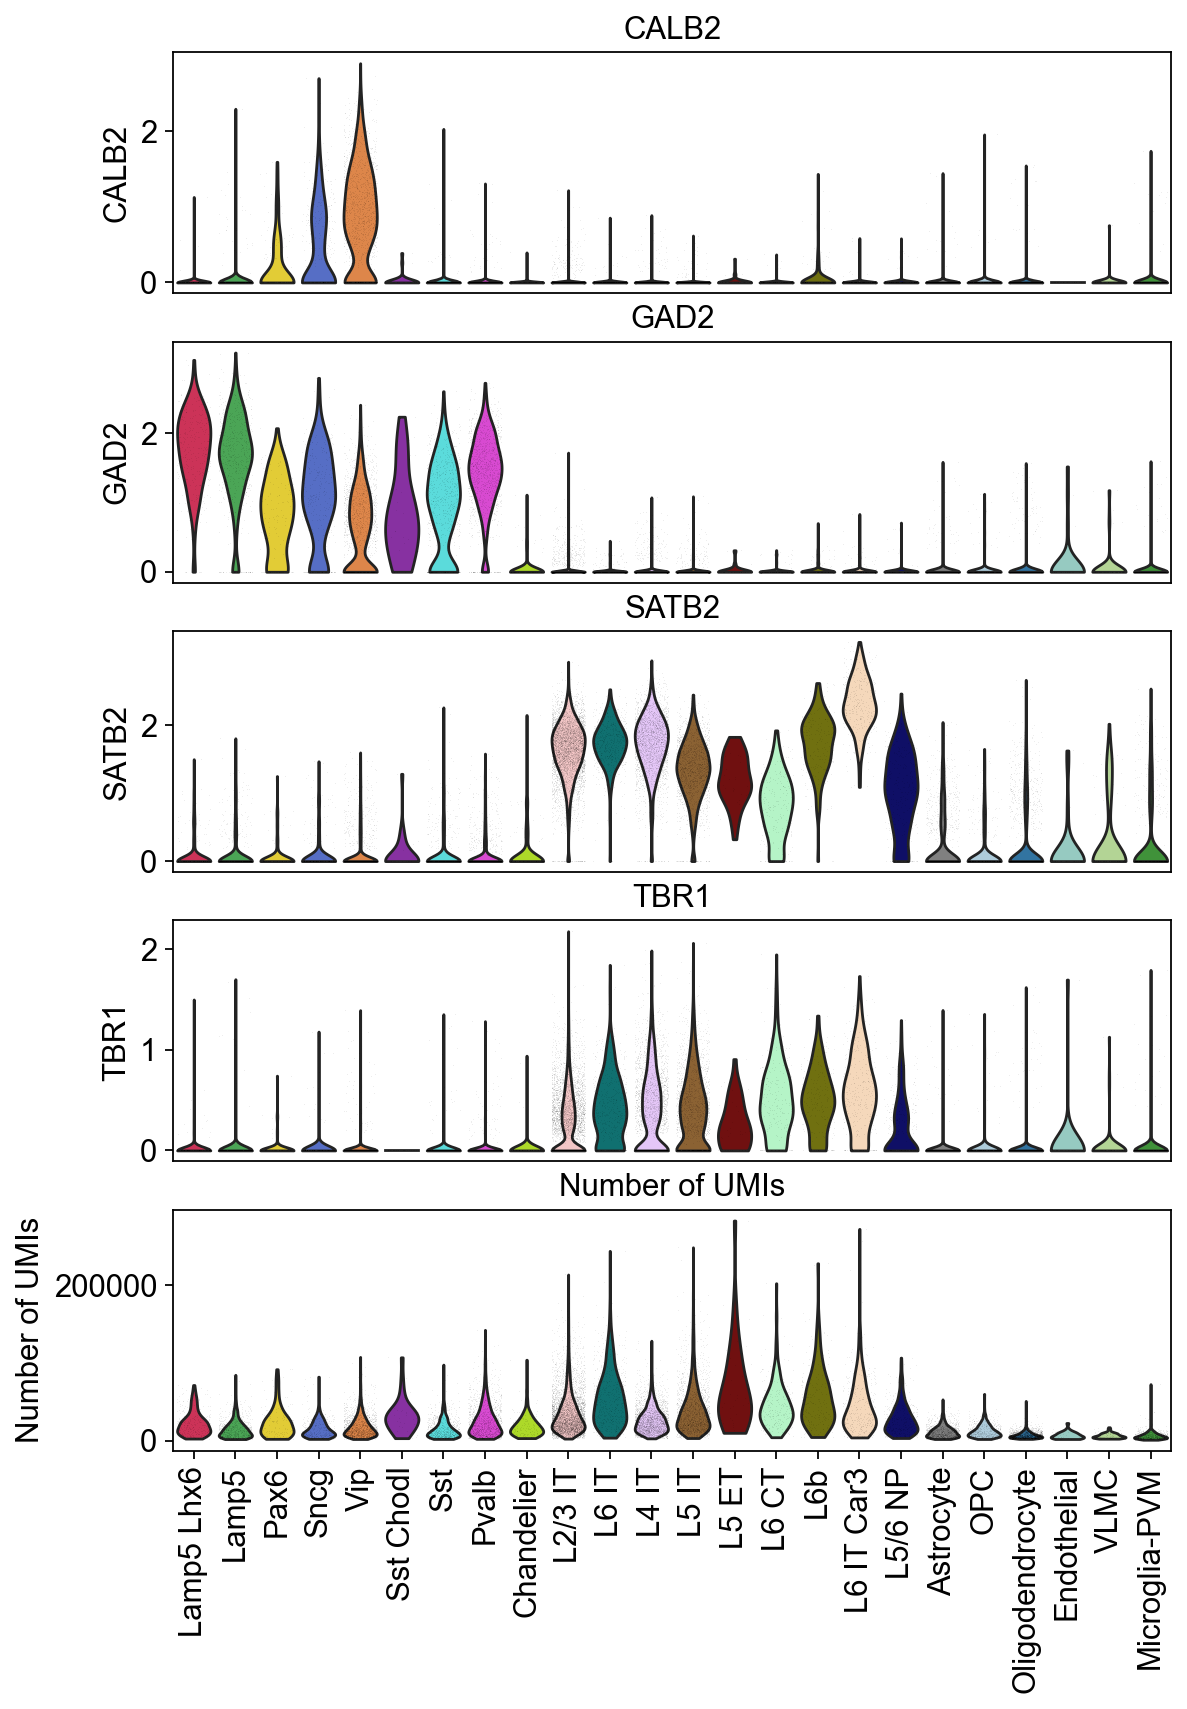

In [22]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=8,
                              height_single=2.3,
                              groupby='Subclass',
                              show_grid=False)

Adding the horizontal grid line

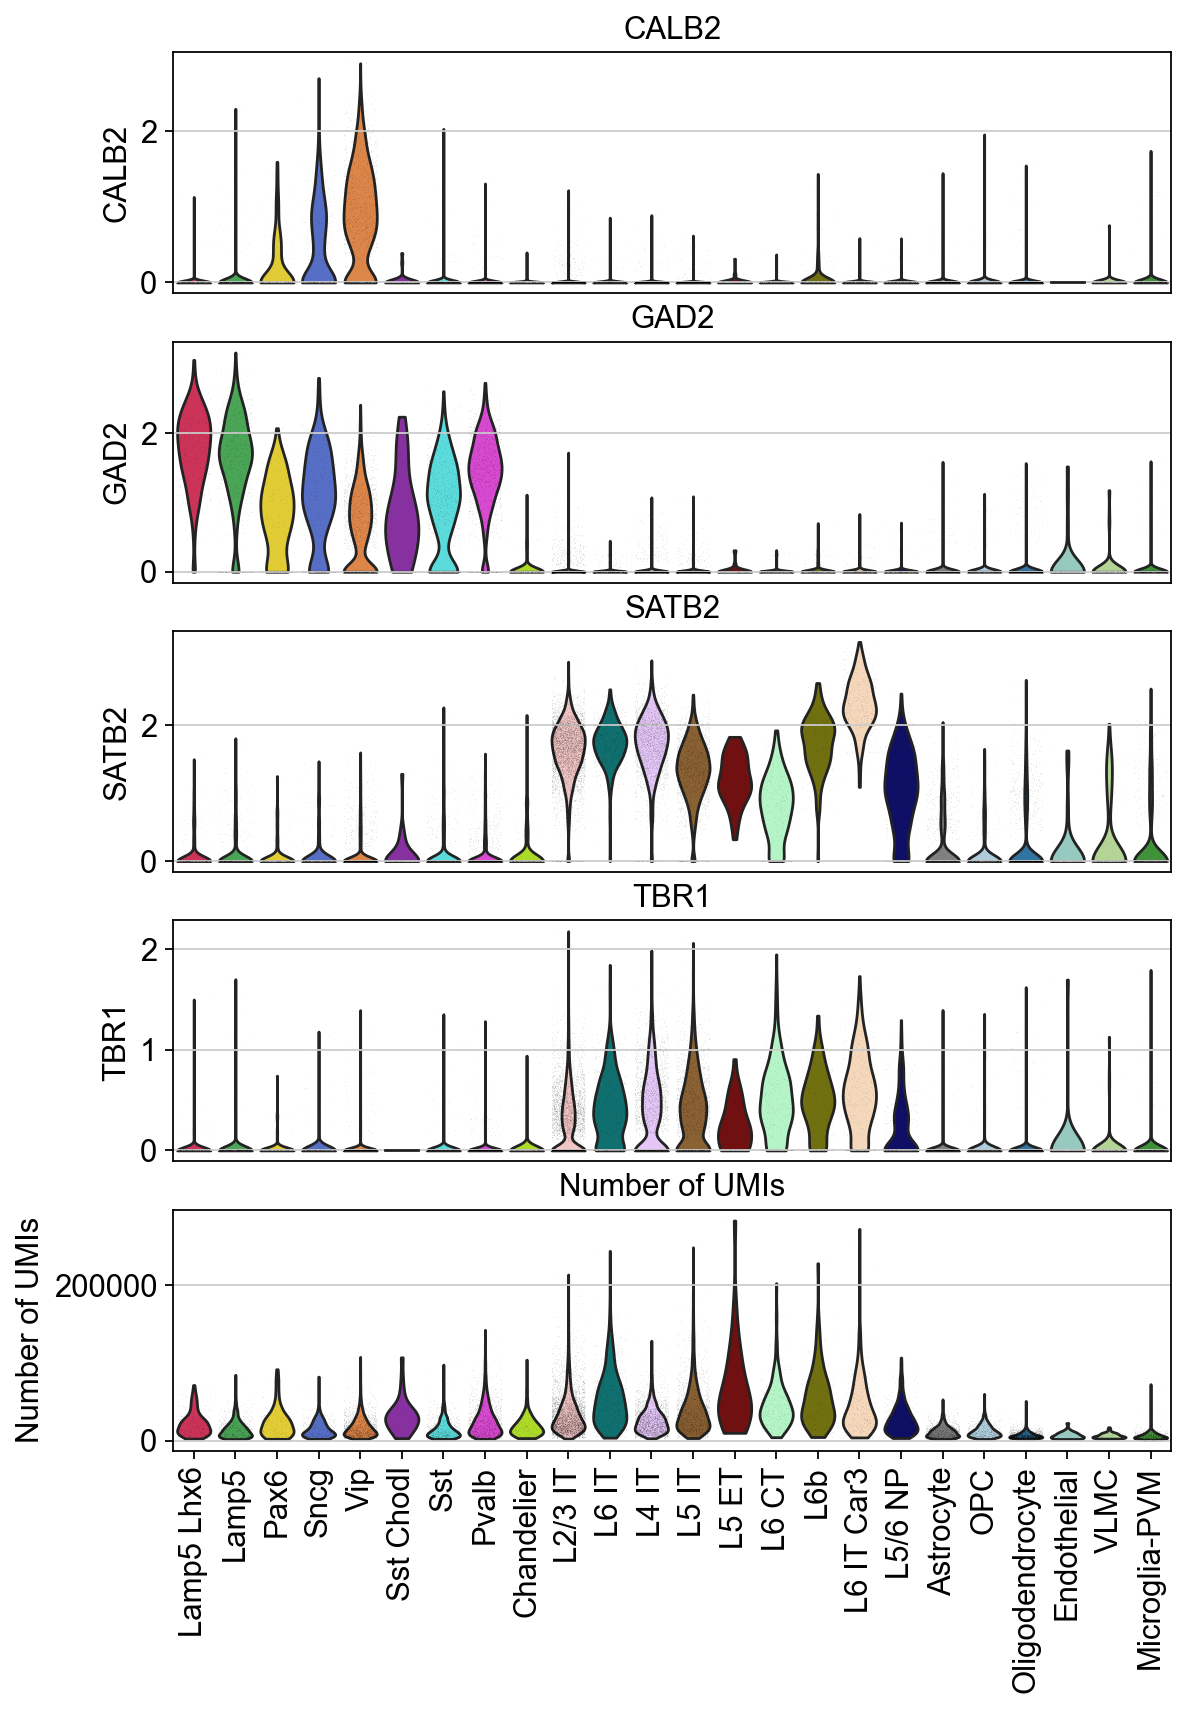

In [23]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=8,
                              height_single=2.3,
                              groupby='Subclass')

The height and widhts of these plots can be adjusted according to the number of features and groups you have for better visualization.

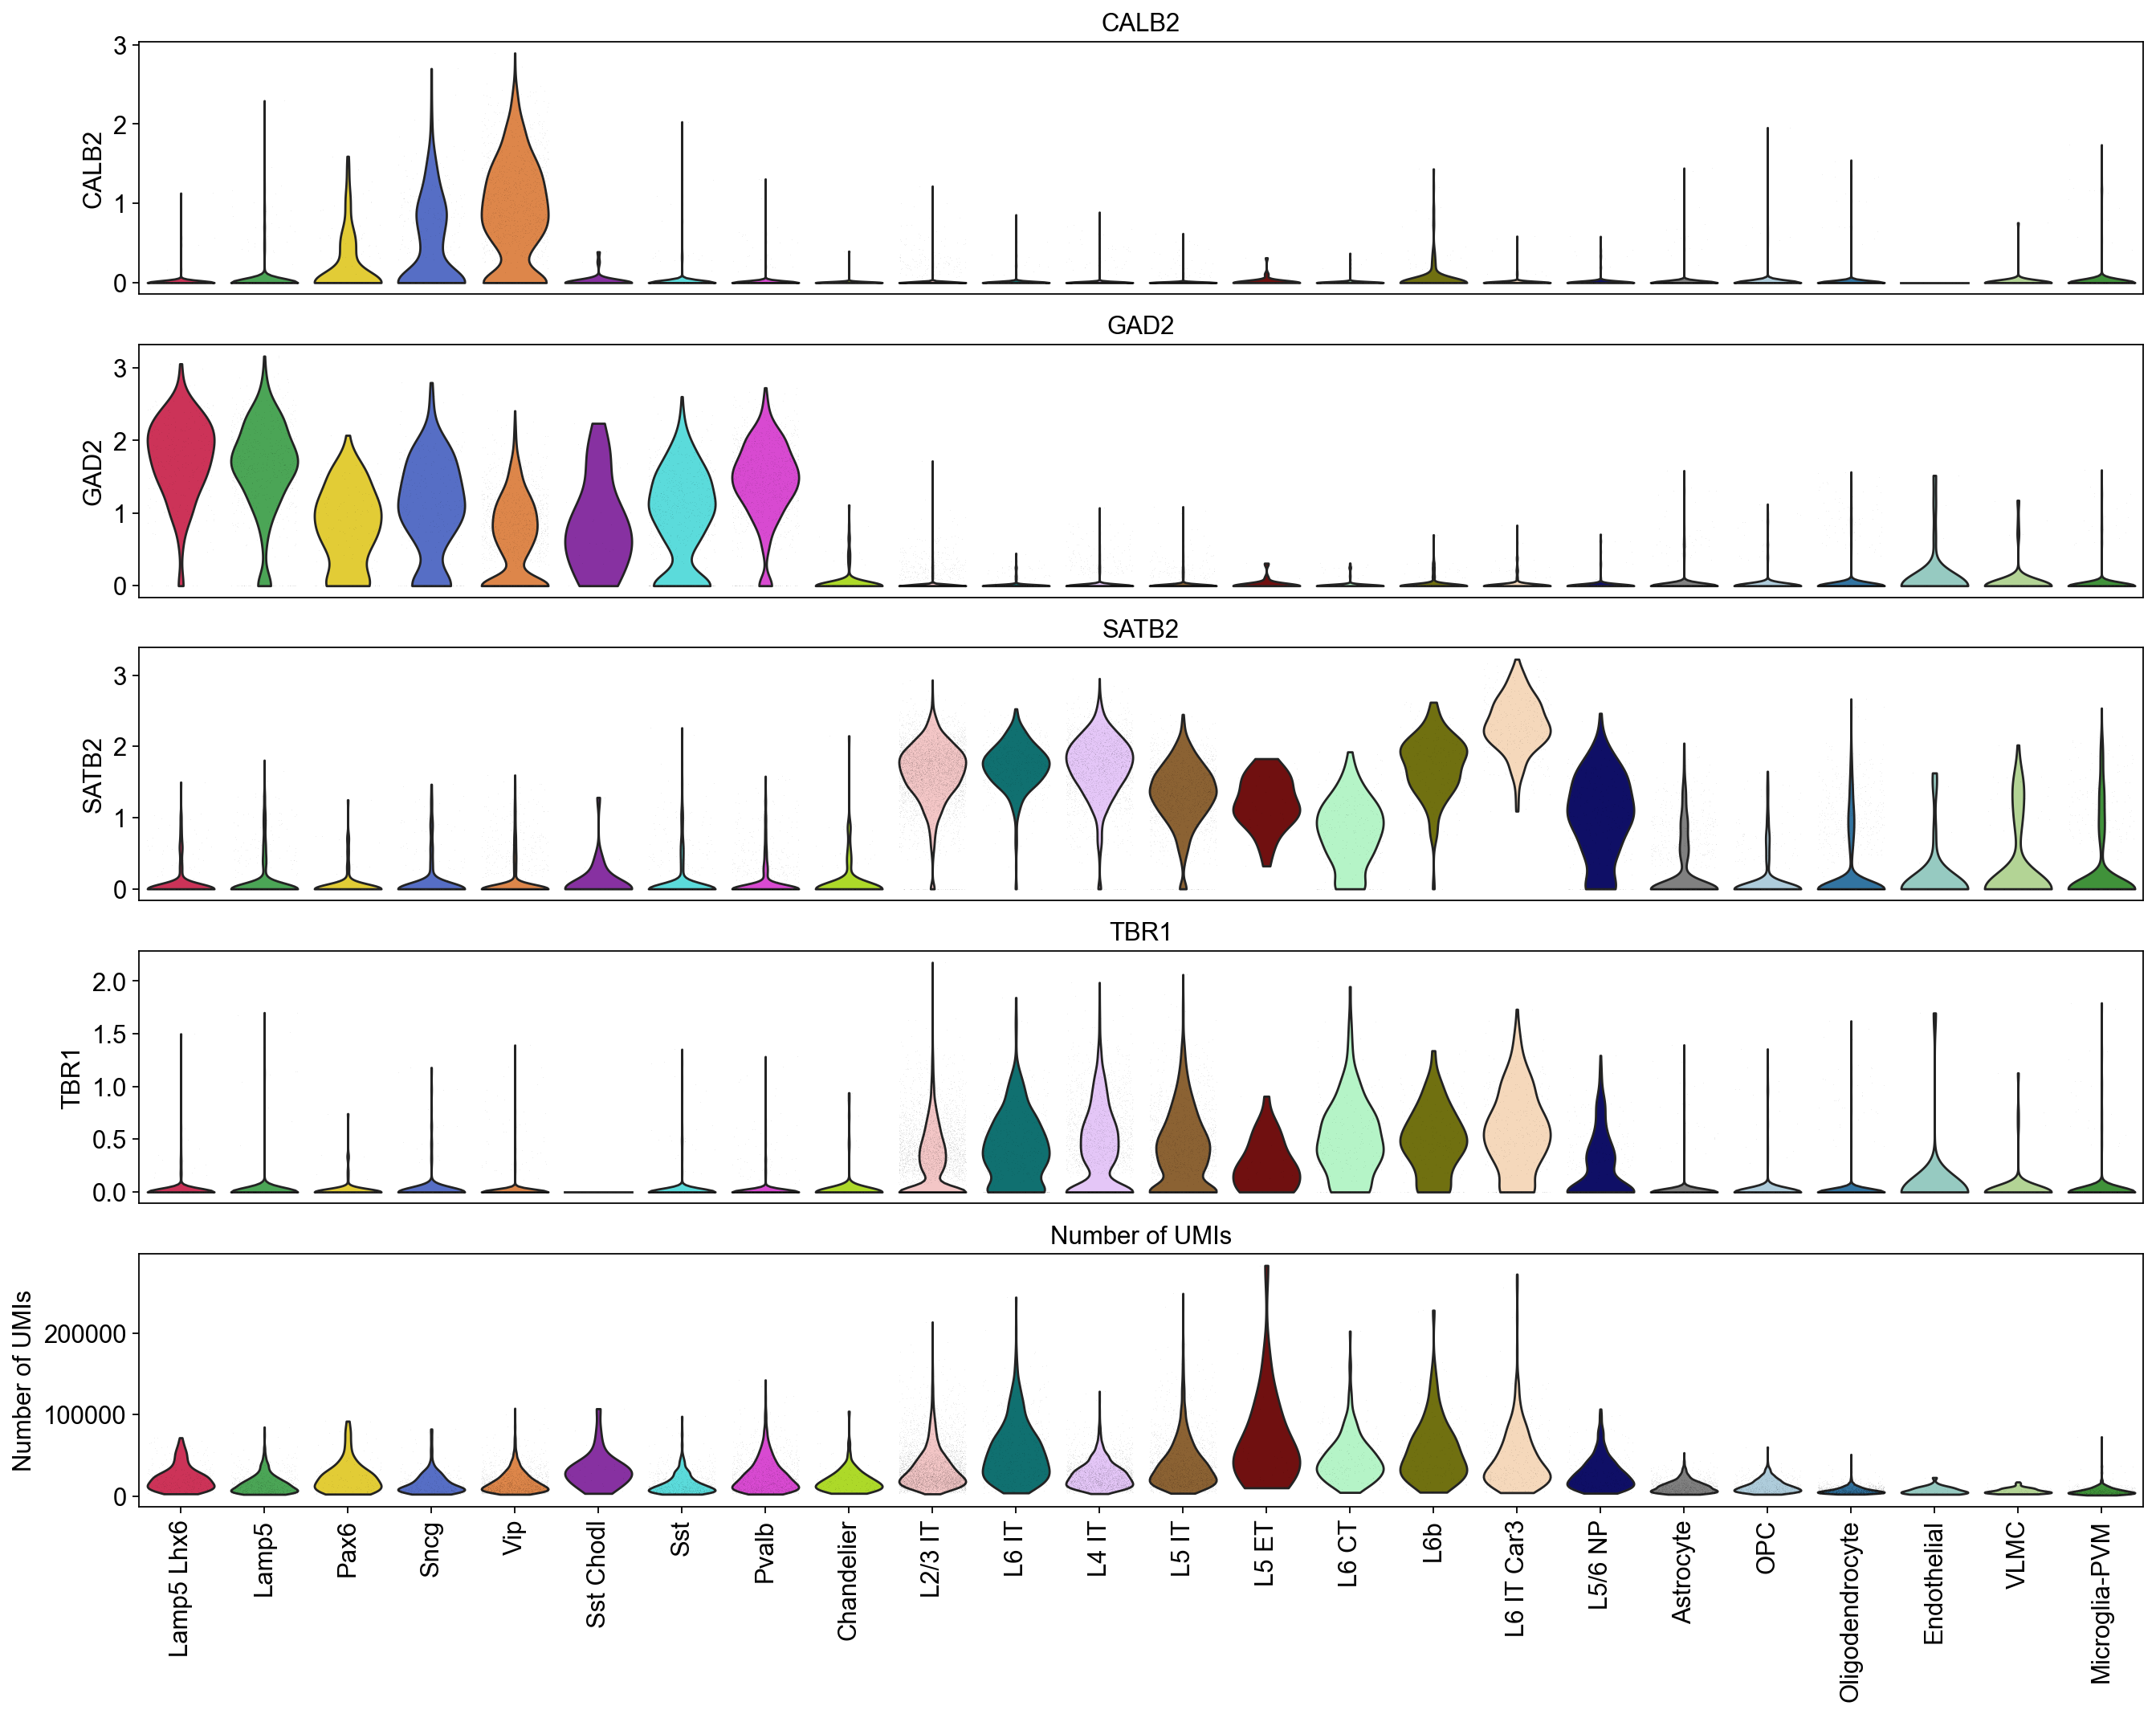

In [24]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=20,
                              height_single=3,
                              groupby='Subclass',
                              show_grid=False)

### Violin plots of entire data

We can visualize the entire dataset as a single group, adjusting the dot size to plot all the cells onto the violin plot.

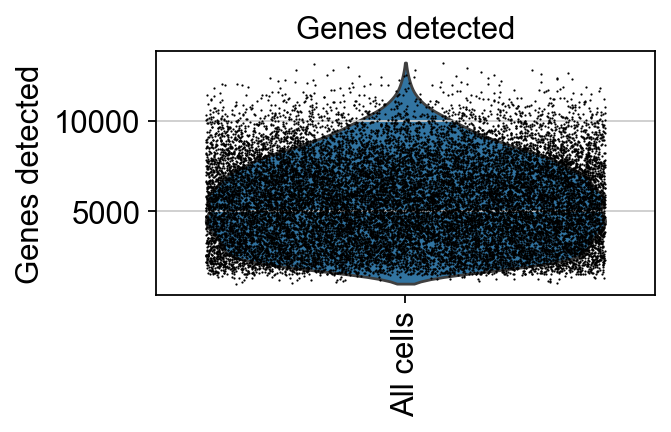

In [25]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'Genes detected'],
                              width_single=4,
                              height_single=2.0,
                              size=1)

We can visualize the distributions of the cells across various features together.

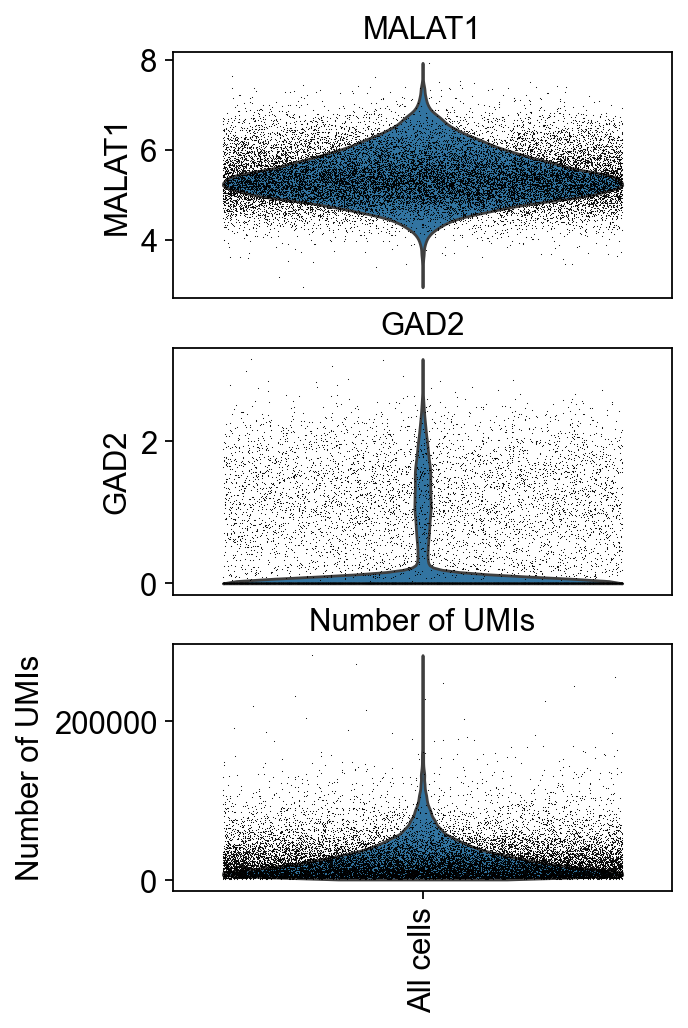

In [26]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'MALAT1', 'GAD2', 'Number of UMIs'],
                              width_single=4,
                              height_single=2.3,
                              size=0.5,
                              show_grid=False)

### Save output plots
Use the `save` parameter to specific the file name and path to save:

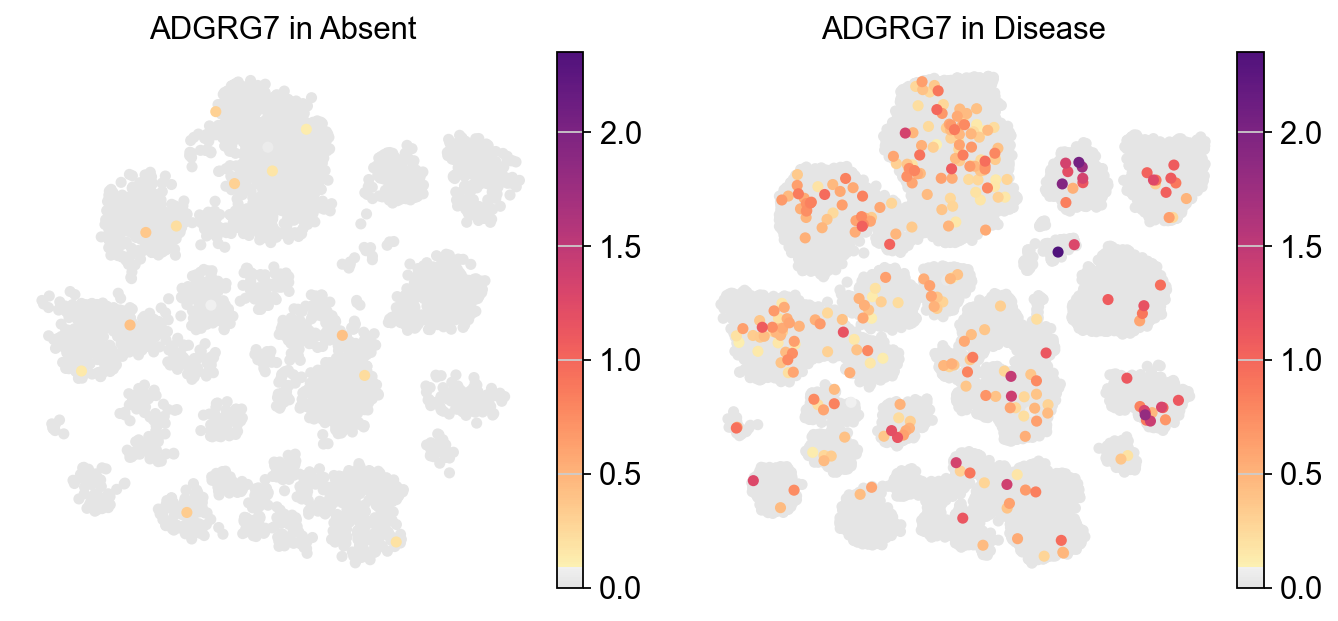

Figure saved to:  ./PIASO_UMAP_split_by_condition.pdf


In [27]:
piaso.pl.plot_embeddings_split(adata,
                               color='ADGRG7',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,
                               save='./PIASO_UMAP_split_by_condition.pdf')

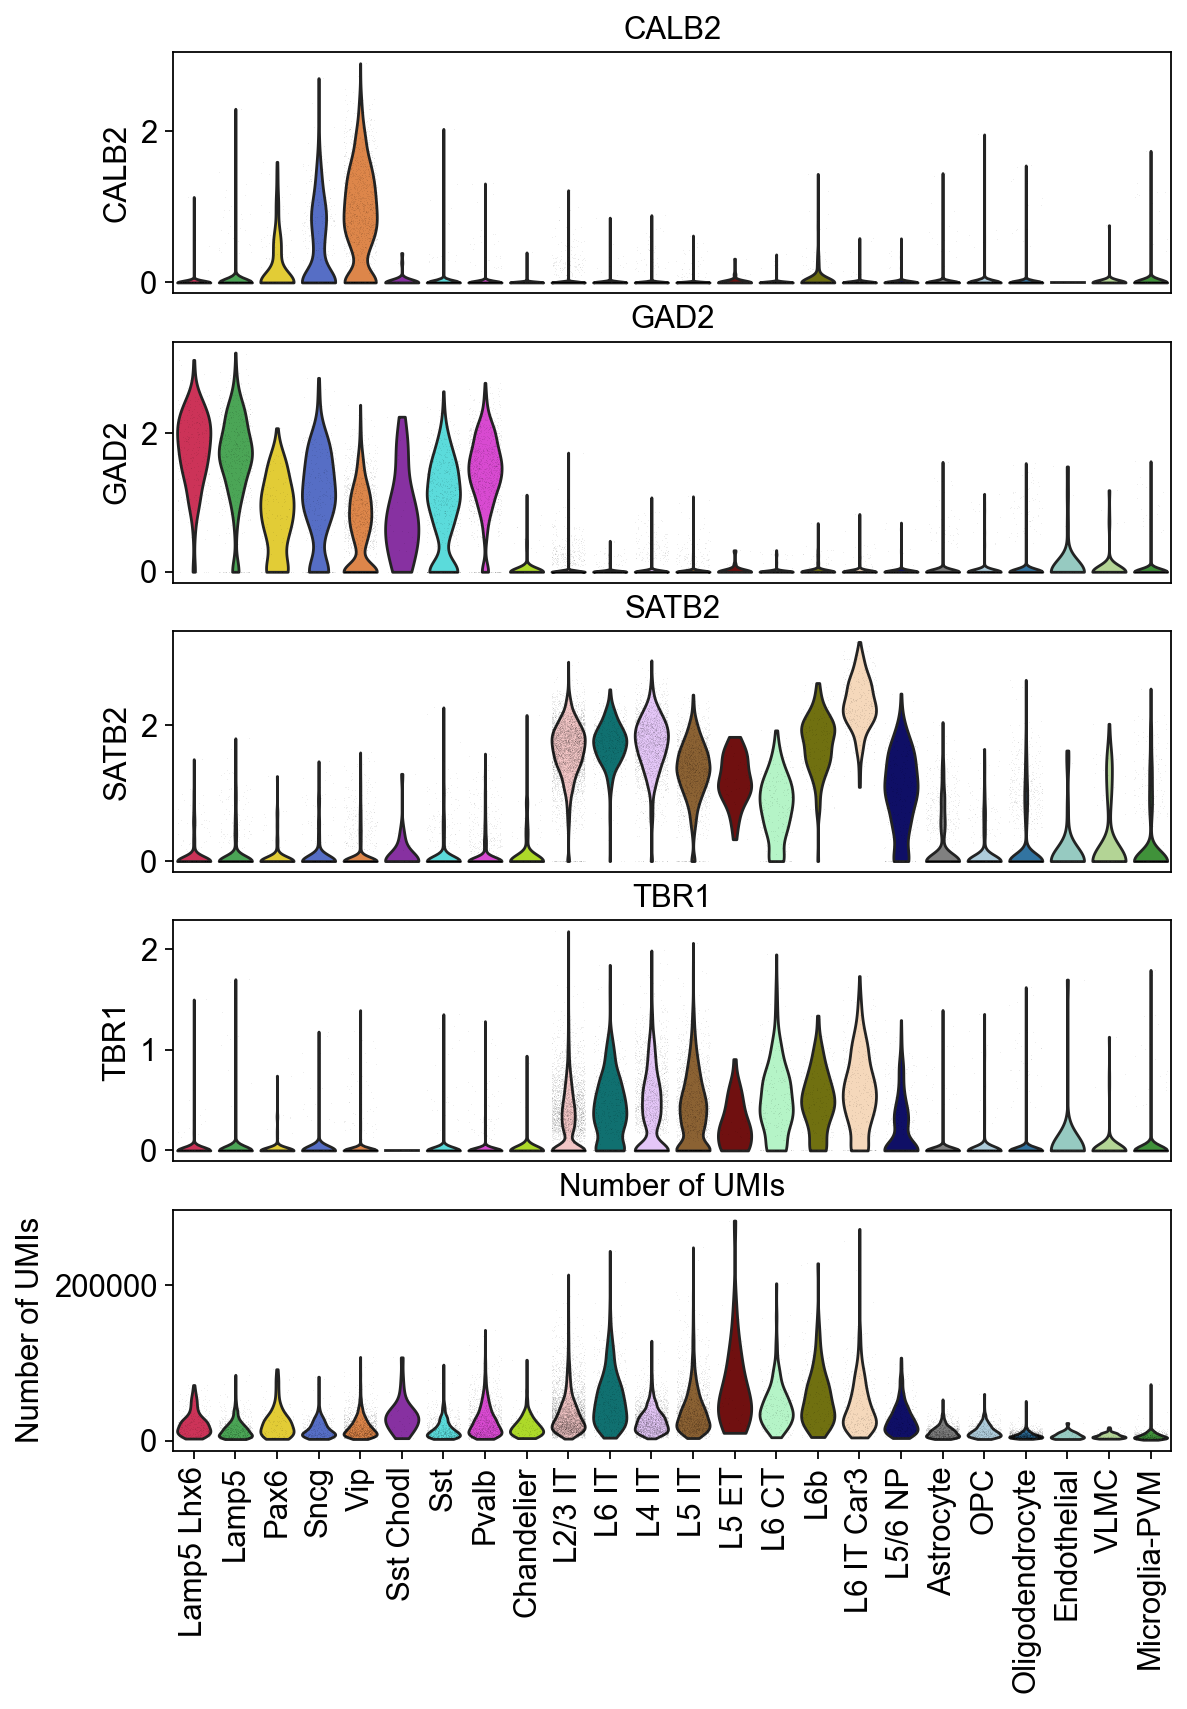

Figure saved to: ./violin_plot_piaso.pdf


In [28]:
piaso.pl.plot_features_violin(adata,
                              feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
                              width_single=8,
                              height_single=2.3,
                              groupby='Subclass',
                              show_grid=False,
                              save='./violin_plot_piaso.pdf')

### Combine categorical variables

In [29]:
mapping_dict={'Absent': 'Control',
 'Sparse': 'Disease',
 'Moderate': 'Disease',
 'Frequent': 'Disease'}

In [30]:
adata.obs['Condition']=adata.obs['CERAD score'].map(mapping_dict)

In [31]:
adata.obs['SubclassXCondition'] = piaso.pp.getCrossCategories(adata.obs, 'Subclass', 'Condition', )

By combining multiple categories, while maintaining the original orders of the categories, you could show the gene expression changes at cell type level across different conditions.

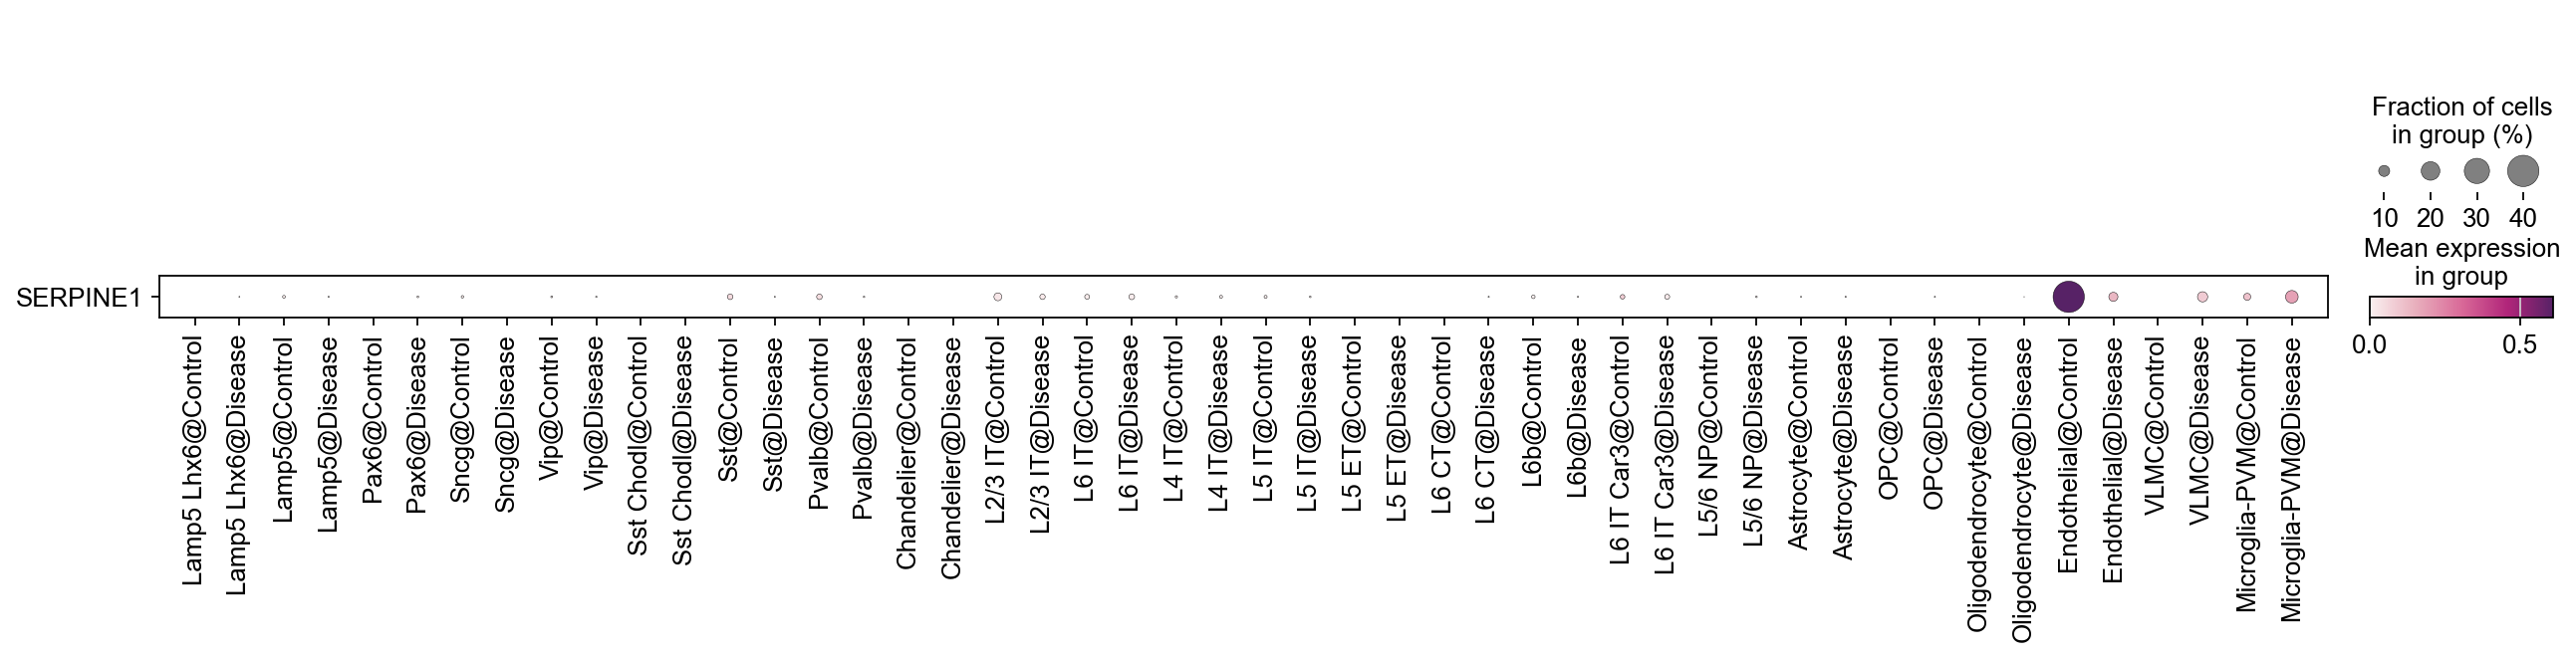

In [32]:
sc.pl.dotplot(
    adata,
    var_names=['SERPINE1'],
    groupby='SubclassXCondition',
    swap_axes=True,
    cmap=piaso.pl.color.c_color4
)

We can also switch the order in which we combine the categorical variables.

In [33]:
adata.obs['ConditionXSubclass'] = piaso.pp.getCrossCategories(adata.obs, 'Condition', 'Subclass',)

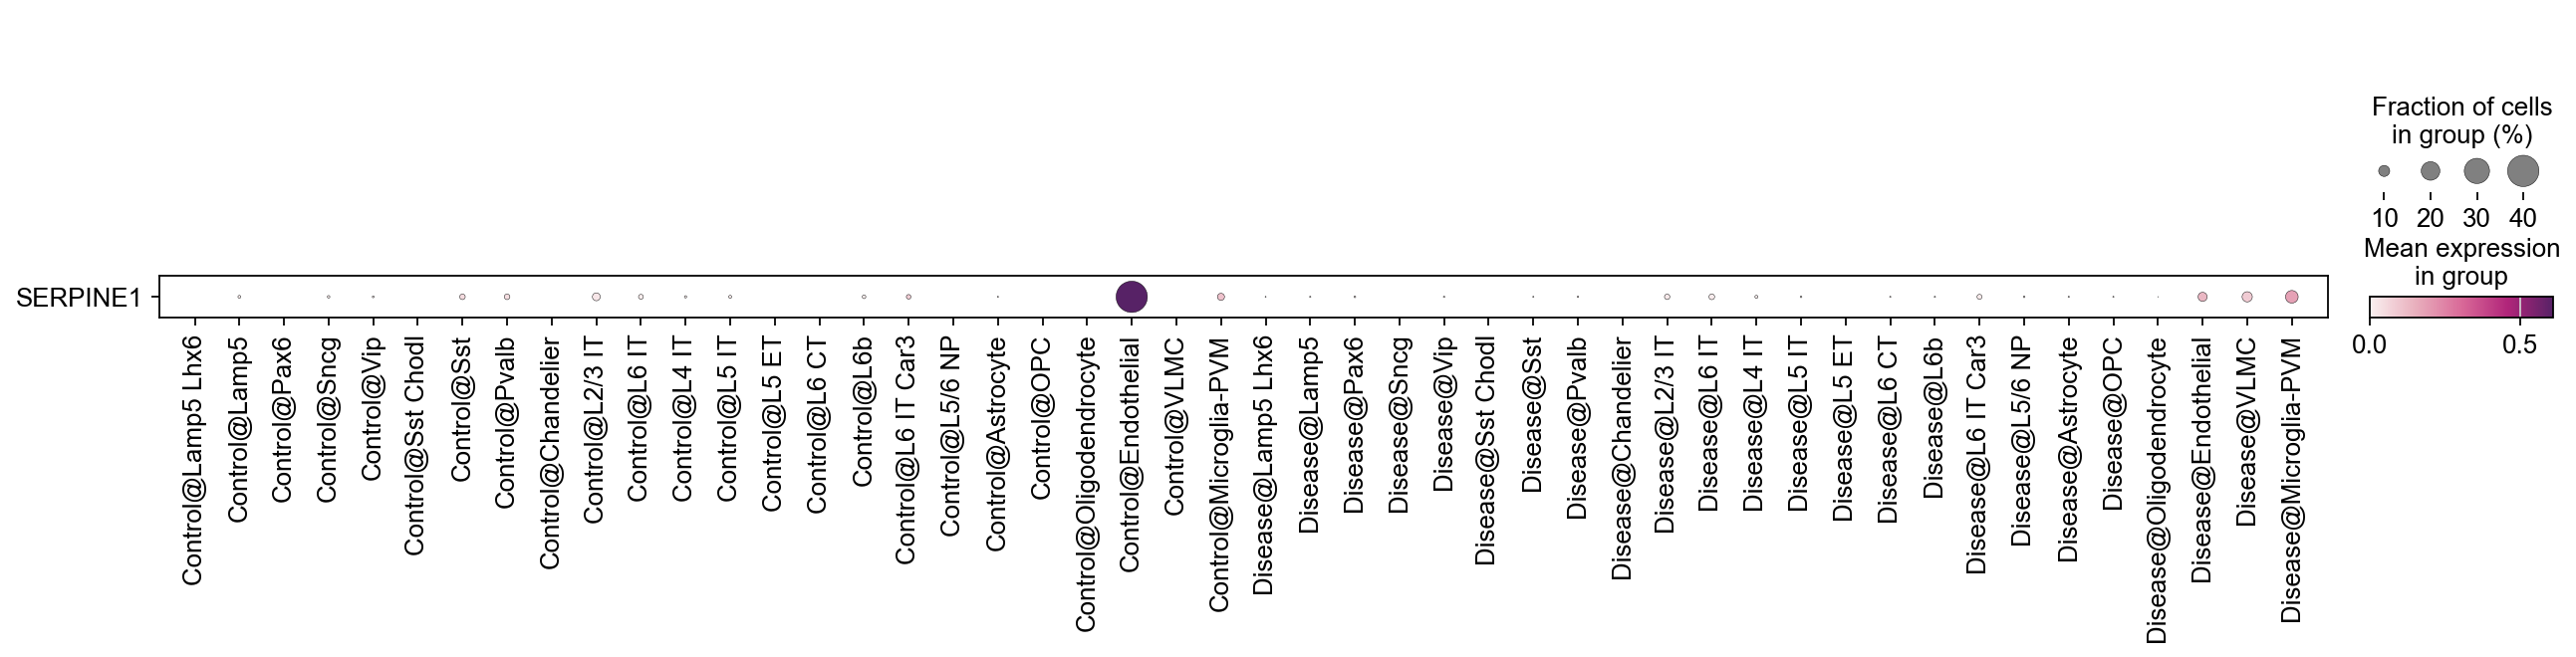

In [34]:
sc.pl.dotplot(
    adata,
    var_names=['SERPINE1'],
    groupby='ConditionXSubclass',
    swap_axes=True,
    cmap=piaso.pl.color.c_color4
)

### Count the number of cells in each category

In [35]:
piaso.pp.table(adata.obs['Subclass'])

{'Microglia-PVM': 638,
 'Lamp5': 653,
 'OPC': 496,
 'L5/6 NP': 299,
 'Oligodendrocyte': 1663,
 'L2/3 IT': 4826,
 'Vip': 1551,
 'Lamp5 Lhx6': 305,
 'L5 IT': 1797,
 'L4 IT': 2388,
 'Pvalb': 1299,
 'Astrocyte': 1080,
 'L6 IT': 605,
 'Sst': 780,
 'L6 IT Car3': 354,
 'VLMC': 86,
 'L6b': 224,
 'Pax6': 140,
 'L6 CT': 231,
 'Sncg': 329,
 'L5 ET': 37,
 'Chandelier': 157,
 'Sst Chodl': 31,
 'Endothelial': 31}

You can use the rank parameter to order the results, and the ascending parameter to determine the order of the ranking.

In [36]:
piaso.pp.table(adata.obs['Subclass'], rank = True, ascending = True)

{'Sst Chodl': 31,
 'Endothelial': 31,
 'L5 ET': 37,
 'VLMC': 86,
 'Pax6': 140,
 'Chandelier': 157,
 'L6b': 224,
 'L6 CT': 231,
 'L5/6 NP': 299,
 'Lamp5 Lhx6': 305,
 'Sncg': 329,
 'L6 IT Car3': 354,
 'OPC': 496,
 'L6 IT': 605,
 'Microglia-PVM': 638,
 'Lamp5': 653,
 'Sst': 780,
 'Astrocyte': 1080,
 'Pvalb': 1299,
 'Vip': 1551,
 'Oligodendrocyte': 1663,
 'L5 IT': 1797,
 'L4 IT': 2388,
 'L2/3 IT': 4826}

In [37]:
piaso.pp.table(adata.obs['Subclass'], rank = True, ascending = False)

{'L2/3 IT': 4826,
 'L4 IT': 2388,
 'L5 IT': 1797,
 'Oligodendrocyte': 1663,
 'Vip': 1551,
 'Pvalb': 1299,
 'Astrocyte': 1080,
 'Sst': 780,
 'Lamp5': 653,
 'Microglia-PVM': 638,
 'L6 IT': 605,
 'OPC': 496,
 'L6 IT Car3': 354,
 'Sncg': 329,
 'Lamp5 Lhx6': 305,
 'L5/6 NP': 299,
 'L6 CT': 231,
 'L6b': 224,
 'Chandelier': 157,
 'Pax6': 140,
 'VLMC': 86,
 'L5 ET': 37,
 'Sst Chodl': 31,
 'Endothelial': 31}

In order to store the results as a dataframe, set as_dataframe = True.

In [38]:
subclass_df = piaso.pp.table(adata.obs['Subclass'], rank = True, ascending = False, as_dataframe = True)